In [1]:
import numpy as np
import pandas as pd
import warnings

import matplotlib.pyplot as plt
# import missingno
import seaborn as sns

from tqdm import tqdm

tqdm.pandas()
# silence warnings
warnings.filterwarnings("ignore")

In [2]:
# setting some CONSTANTs
plt.style.use(['science'])
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",   # specify font family here
    "font.serif": ["Palatino"],  # specify font here
    "font.size":12})

CATEGORY = 'Pet_Supplies'
FIGSIZE = (12, 8)

# Exploratory Data Analysis (EDA)

## 1. Data Exploration

### Loading Dataset

In [3]:
products = pd.read_csv(f"../data/interim/{CATEGORY}_merged.csv")

# check first 5 rows
products.head()

,asin,title,categories,reviewerID,overall,reviewText,reviewTime
0,1223000893,"Cat Sitter DVD Trilogy - Vol 1, Vol 2 and Vol 3",[],A14CK12J7C7JRK,3.0,I purchased the Trilogy with hoping my two cat...,"01 12, 2011"
1,1223000893,"Cat Sitter DVD Trilogy - Vol 1, Vol 2 and Vol 3",[],A39QHP5WLON5HV,5.0,There are usually one or more of my cats watch...,"09 14, 2013"
2,1223000893,"Cat Sitter DVD Trilogy - Vol 1, Vol 2 and Vol 3",[],A2CR37UY3VR7BN,4.0,I bought the triliogy and have tested out all ...,"12 19, 2012"
3,1223000893,"Cat Sitter DVD Trilogy - Vol 1, Vol 2 and Vol 3",[],A2A4COGL9VW2HY,4.0,My female kitty could care less about these vi...,"05 12, 2011"
4,1223000893,"Cat Sitter DVD Trilogy - Vol 1, Vol 2 and Vol 3",[],A2UBQA85NIGLHA,3.0,"If I had gotten just volume two, I would have ...","03 5, 2012"


### Descriptive Statistics

In [4]:
products.describe(include='all')

,asin,title,categories,reviewerID,overall,reviewText,reviewTime
count,111626,111626,111626,111626,111626.000000,111626,111626
unique,4950,4856,558,19738,NaN,94334,2732
top,B0002DHV16,Cat Dancer - Cat Charmer Wand Teaser Toy,"['Pet Supplies', 'Dogs', 'Toys', 'Chew Toys']",A11FX8HL2ANK6T,NaN,good product,"01 7, 2014"
freq,904,904,6928,136,NaN,4,337
mean,NaN,NaN,NaN,NaN,4.213239,NaN,NaN
std,NaN,NaN,NaN,NaN,1.190185,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,5.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,5.000000,NaN,NaN


In [5]:
# summary statistics 
def summary_statistics(df):
    print(f"The dataframe consists of {df.shape[0]} rows and {df.shape[1]} columns")

    for col in df.columns:
        print(f"The number of unique {col}: {df[col].nunique()}")
        
summary_statistics(products)

The dataframe consists of 111626 rows and 7 columns
The number of unique asin: 4950
The number of unique title: 4856
The number of unique categories: 558
The number of unique reviewerID: 19738
The number of unique overall: 5
The number of unique reviewText: 94334
The number of unique reviewTime: 2732


In [6]:
# create a temp category column based on first element and subsequently 2nd last element.
# products['categories'] = products['categories'].progress_apply(lambda x: eval(x)[0][1])

### What is the rating globally and category-wise?

In [7]:
def product_ratings(df, agg="mean"):
    """Retrieving aggregrated review counts based on target group.

        Args:
            df [pd.DataFrame]:
            group [str]:
            agg [str]:
        Returns:
            reviews_by_group [pd.DataFrame]
    """

    rating_by_prod = df.groupby(["asin"]).agg({"overall": agg})
    rating_by_user = df.groupby(["reviewerID"]).agg({"overall": agg})

    # summary statistics
    print("==========")
    print(f"Global average ratings: {df['overall'].mean()}")
    print("For product rating:")
    print(
        f"Minimum rating for product: {rating_by_prod.min()[0]}, Maximum rating for products: {rating_by_prod.max()[0]}"
    )
    print(f"Average rating per products: {rating_by_prod.mean()[0]}")
    print(
        f"The interquartile range:\n{rating_by_prod['overall'].quantile([.25, 0.5, .75])}\n"
    )
    print("For user rating:")
    print(
        f"Minimum rating for users: {rating_by_user.min()[0]}, Maximum rating for users: {rating_by_user.max()[0]}"
    )
    print(f"Average rating per users: {rating_by_user.mean()[0]}")
    print(
        f"The interquartile range:\n{rating_by_user['overall'].quantile([.25, 0.5, .75])}\n"
    )

In [8]:
# rating average as a whole
product_ratings(products)

Global average ratings: 4.213238851163707
For product rating:
Minimum rating for product: 1.25, Maximum rating for products: 5.0
Average rating per products: 4.188550276740431
The interquartile range:
0.25    3.888889
0.50    4.277778
0.75    4.600000
Name: overall, dtype: float64

For user rating:
Minimum rating for users: 1.0, Maximum rating for users: 5.0
Average rating per users: 4.219430266569734
The interquartile range:
0.25    3.800000
0.50    4.333333
0.75    4.866667
Name: overall, dtype: float64



In [9]:
# rating by categories
rating_by_cat = products.groupby(["categories"]).agg({"overall": 'mean'}).sort_values(by='overall', ascending=False)

print(f"Category-wise ratings:\n {rating_by_cat[:10]}")

Category-wise ratings:
                                                      overall
categories                                                  
['Pet Supplies', 'Reptiles & Amphibians', 'Terr...  5.000000
['Pet Supplies', 'Cats', 'Health Supplies', 'Su...  5.000000
['Pet Supplies', 'Try Subscribe & Save', 'Pets'...  4.923077
['Pet Supplies', 'Bunny Rabbit Central', 'Feedi...  4.900000
['Pet Supplies', 'Dogs', 'Food', 'Dehydrated/Fr...  4.900000
['Pet Supplies', 'Cats', 'Grooming', 'Styptic G...  4.888889
['Pet Supplies', 'Fish &amp; Aquatic Pets', 'He...  4.875000
['Pet Supplies', 'Small Animals', 'Houses &amp;...  4.875000
['Pet Supplies', 'Dogs', 'Grooming', 'Electric ...  4.875000
['Pet Supplies', 'Horses', 'Pest Control', 'Fly...  4.857143


### What is the review count globally and category-wise?

In [10]:
def reviews_count(df, agg="count"):
    """Retrieving aggregrated review counts based on target group.

        Args:
            df [pd.DataFrame]:
            group [str]:
            agg [str]:
        Returns:
            reviews_by_group [pd.DataFrame]
    """

    reviews_by_prod = df.groupby(["asin"]).agg({"reviewText": agg})
    reviews_by_user = df.groupby(["reviewerID"]).agg({"reviewText": agg})

    # summary statistics
    print("==========")
    print(f"Global average ratings: {df['overall'].mean()}")
    print("For product reviews:")
    print(
        f"Minimum reviews for product: {reviews_by_prod.min()[0]}, Maximum reviews for products: {reviews_by_prod.max()[0]}"
    )
    print(f"Average reviews per products: {reviews_by_prod.mean()[0]}")
    print(
        f"The interquartile range:\n{reviews_by_prod['reviewText'].quantile([.25, 0.5, .75])}\n"
    )
    print("For user reviews:")
    print(
        f"Minimum reviews for users: {reviews_by_user.min()[0]}, Maximum reviews for users: {reviews_by_user.max()[0]}"
    )
    print(f"Average reviews per users: {reviews_by_user.mean()[0]}")
    print(
        f"The interquartile range:\n{reviews_by_user['reviewText'].quantile([.25, 0.5, .75])}\n"
    )

In [11]:
# review counts as whole
reviews_count(products)

Global average ratings: 4.213238851163707
For product reviews:
Minimum reviews for product: 4, Maximum reviews for products: 904
Average reviews per products: 22.55070707070707
The interquartile range:
0.25     7.0
0.50    11.0
0.75    21.0
Name: reviewText, dtype: float64

For user reviews:
Minimum reviews for users: 1, Maximum reviews for users: 136
Average reviews per users: 5.6553855507143584
The interquartile range:
0.25    3.0
0.50    5.0
0.75    7.0
Name: reviewText, dtype: float64



In [12]:
# reviews by categories
reviews_by_cat = products.groupby(["categories"]).agg({"reviewText": 'count'}).sort_values(by='reviewText', ascending=False)

print(f"Category-wise ratings:\n {reviews_by_cat[:10]}")

Category-wise ratings:
                                                     reviewText
categories                                                    
['Pet Supplies', 'Dogs', 'Toys', 'Chew Toys']             6928
['Pet Supplies', 'Dogs', 'Treats', 'Cookies, Bi...        4411
['Pet Supplies', 'Dogs', 'Toys', 'Balls']                 3896
['Pet Supplies', 'Dogs', 'Toys', 'Squeak Toys']           3526
['Pet Supplies', 'Dogs', 'Food', 'Dry']                   2591
['Pet Supplies', 'Cats', 'Toys', 'Mice & Animal...        2580
['Pet Supplies', 'Cats', 'Food', 'Wet', 'Canned']         1886
['Pet Supplies', 'Dogs', 'Toys']                          1782
['Pet Supplies', 'Cats', 'Toys', 'Catnip Toys']           1582
['Pet Supplies', 'Fish & Aquatic Pets', 'Aquari...        1498


## 2. Data Visualisation

In [13]:
# let's look at the average rating by products
def compute_mean_ratings(df, count_col, rating_col):
    """[summary]

    Args:
        df ([type]): [description]
        target_col ([type]): [description]
    """

    prod_mean_ratings = df.groupby(["asin"]).agg({rating_col: np.mean}).reset_index()
    prod_count_ratings = df.groupby(["asin"]).agg({count_col: "count"}).reset_index()
    prod_ratings_merged = pd.merge(
        prod_count_ratings, prod_mean_ratings, how="inner", on="asin"
    )

    prod_ratings_merged.columns = ["asin", "rating_counts", "rating_average"]

    return prod_ratings_merged

def compute_weighted_ratings(df, count_col, avg_rating_col, threshold=0.75):
    """Computes weighted ratings based on number of ratings and average rating.

        Args:
            df [pd.DataFrame]: DataFrame consisting both rating counts and average rating.
            count_col [str]: Column name for number of ratings.
            avg_rating_col [str]: Column name for average rating.
            threshold [float]: Threshold for minimum of ratings/reviews to qualify for ranking.
        Returns:
            df [pd.DataFrame]: DataFrame with newly computed weighted ratings
    """

    m = df[count_col].quantile(threshold)
    C = df[avg_rating_col].mean()  # global average rating

    df["rating_weighted_average"] = df.apply(
        lambda x: (
            (x[count_col] / (x[count_col] + m) * x[avg_rating_col])
            + (m / (m + x[count_col]) * C)
        ),
        axis=1,
    )

    return df

In [14]:
product_agg = compute_mean_ratings(products, 'reviewText', 'overall')
product_weighted_agg = compute_weighted_ratings(product_agg, 'rating_counts', 'rating_average', threshold=.75)

In [15]:
# check first 5 rows
product_weighted_agg.head()

,asin,rating_counts,rating_average,rating_weighted_average
0,1223000893,5,3.800000,4.113829
1,B00005MF9T,36,3.333333,3.648413
2,B00005MF9U,84,3.119048,3.332948
3,B00005MF9V,26,2.692308,3.360842
4,B00005MF9W,64,3.625000,3.764230


### What are top 25 top rated products?

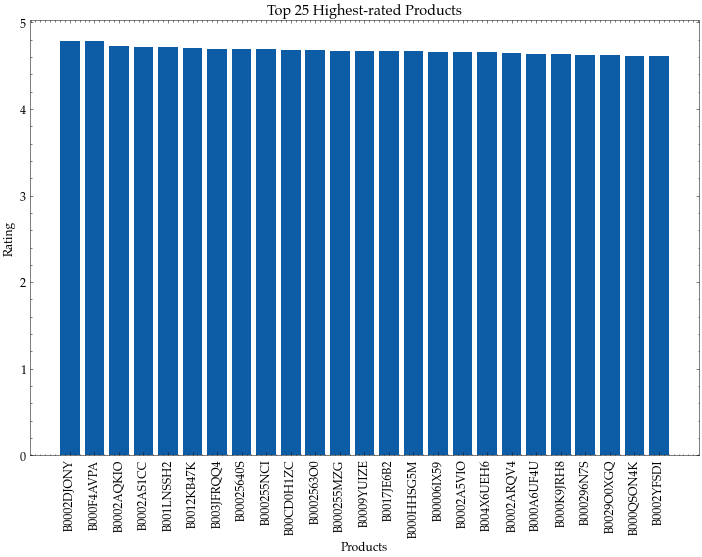

In [16]:
plt.figure(figsize=FIGSIZE)
plt.title("Top 25 Highest-rated Products")
plt.xlabel("Products")
plt.xticks(rotation=90)
plt.ylabel("Rating")

labels = product_agg.sort_values("rating_weighted_average", ascending=False)["asin"].values[:25]
values = product_agg.sort_values("rating_weighted_average", ascending=False)["rating_weighted_average"].values[:25]

plt.bar(labels, values)
plt.show()

### What are top 25 top reviewed products?

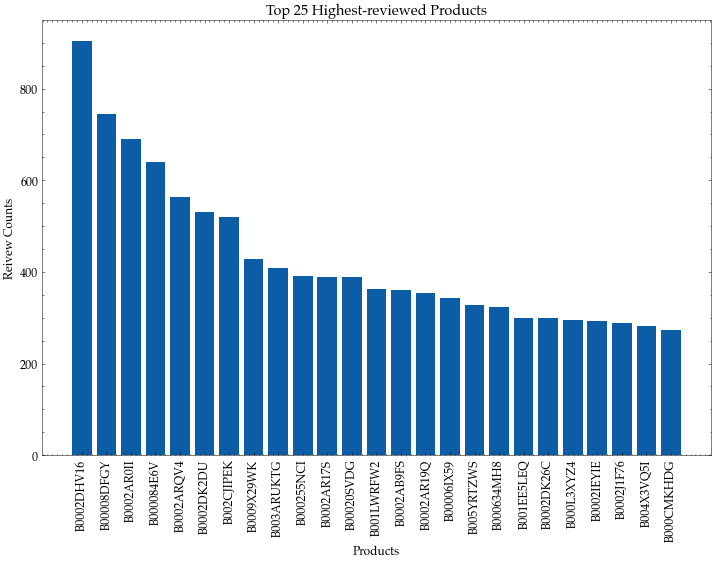

In [17]:
plt.figure(figsize=FIGSIZE)
plt.title("Top 25 Highest-reviewed Products")
plt.xlabel("Products")
plt.xticks(rotation=90)
plt.ylabel("Reivew Counts")

labels = product_agg.sort_values("rating_counts", ascending=False)["asin"].values[:25]
values = product_agg.sort_values("rating_counts", ascending=False)["rating_counts"].values[:25]

plt.bar(labels, values)
plt.show()

### What is the distribution of ratings by products?

In [18]:
def plot_ratings(df, cols=['rating_average', 'rating_weighted_average'], agg_by='products'):
    fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
    fig.suptitle(f"Average vs. Weighted Average Ratings by {agg_by.title()}", y=0.925, verticalalignment='bottom')
    for idx, col in enumerate(cols):
          sns.histplot(df[col], ax=axes[idx], bins=25)

    plt.savefig(f"../reports/figures/rating_distributions_by_{agg_by}.png")
    plt.show()

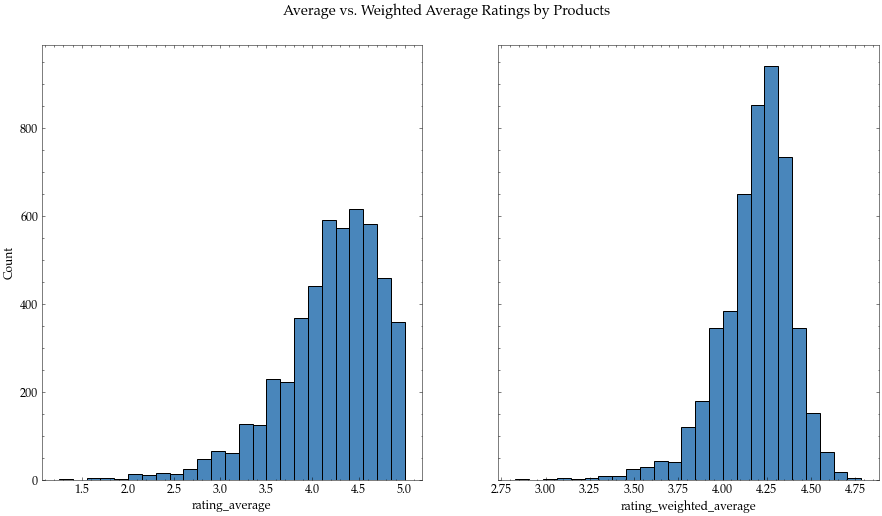

In [19]:
plot_ratings(product_weighted_agg)

### What is the distribution of ratings by users?

In [20]:
# let's look at the average rating by products
def compute_mean_ratings(df, count_col, rating_col):
    """[summary]

    Args:
        df ([type]): [description]
        target_col ([type]): [description]
    """

    prod_mean_ratings = df.groupby(["reviewerID"]).agg({rating_col: np.mean}).reset_index()
    prod_count_ratings = df.groupby(["reviewerID"]).agg({count_col: "count"}).reset_index()
    prod_ratings_merged = pd.merge(
        prod_count_ratings, prod_mean_ratings, how="inner", on="reviewerID"
    )

    prod_ratings_merged.columns = ["reviewerID", "rating_counts", "rating_average"]

    return prod_ratings_merged

def compute_weighted_ratings(df, count_col, avg_rating_col, threshold=0.75):
    """Computes weighted ratings based on number of ratings and average rating.

        Args:
            df [pd.DataFrame]: DataFrame consisting both rating counts and average rating.
            count_col [str]: Column name for number of ratings.
            avg_rating_col [str]: Column name for average rating.
            threshold [float]: Threshold for minimum of ratings/reviews to qualify for ranking.
        Returns:
            df [pd.DataFrame]: DataFrame with newly computed weighted ratings
    """

    m = df[count_col].quantile(threshold)
    C = df[avg_rating_col].mean()  # global average rating

    df["rating_weighted_average"] = df.apply(
        lambda x: (
            (x[count_col] / (x[count_col] + m) * x[avg_rating_col])
            + (m / (m + x[count_col]) * C)
        ),
        axis=1,
    )

    return df

In [21]:
user_agg = compute_mean_ratings(products, 'reviewText', 'overall')
user_weighted_agg = compute_weighted_ratings(user_agg, 'rating_counts', 'rating_average', threshold=.75)

In [22]:
user_weighted_agg.head()

,reviewerID,rating_counts,rating_average,rating_weighted_average
0,A04173782GDZSQ91AJ7OD,5,4.0,4.128001
1,A042274212BJJVOBS4Q85,5,3.2,3.794668
2,A0436342QLT4257JODYJ,10,5.0,4.678589
3,A04795073FIBKY8GSLZYI,4,3.5,3.957819
4,A06658082A27F4VB5UG8E,4,4.0,4.139637


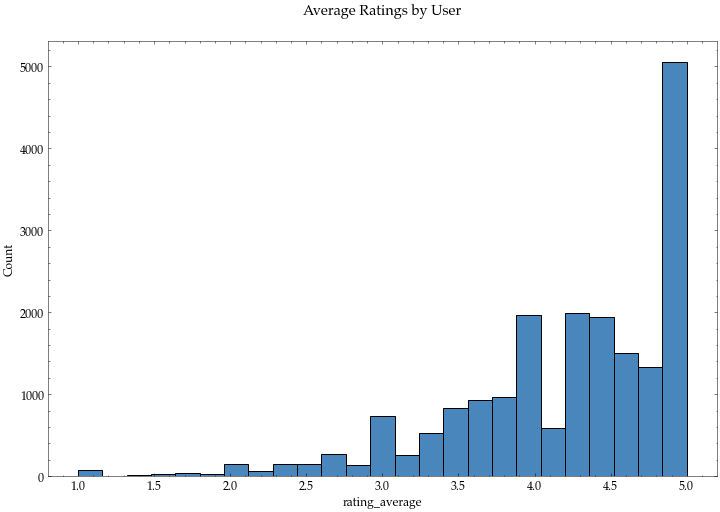

In [23]:
plt.figure(figsize=(12,8))
plt.title("Average Ratings by User", y=1.05)
sns.histplot(user_weighted_agg['rating_average'], bins=25)
plt.savefig(f"../reports/figures/rating_distributions_by_users.png")
plt.show()

In [24]:
pd.set_option('display.max_rows', 100)

In [25]:
products.sort_values(by='reviewText', key=lambda x: x.str.len())[500:600]

,asin,title,categories,reviewerID,overall,reviewText,reviewTime
32692,B0002RJM7I,"Safari Pet Products Safari Flea Comb for Cats,...","['Pet Supplies', 'Cats', 'Flea & Tick Control'...",A34SZWNHESN6H7,4.0,Items works as it should. Grabs fleas as stated.,"07 11, 2014"
108139,B00CD7196C,Majestic Bombay Tooth Scaler (Perfect for Cats...,"['Pet Supplies', 'Cats', 'Health Supplies', 'D...",A3DEZ6XJMPWNKH,5.0,Works great on my dog when he lets me clean them,"07 9, 2014"
104229,B007Z8KO4M,Angels Eyes Product Scoop,"['Pet Supplies', 'Dogs', 'Health Supplies']",A2CM5XYT5Q2MP8,3.0,What can I say. Its a scoop. Serves its purpose.,"07 6, 2014"
32675,B0002RJM7I,"Safari Pet Products Safari Flea Comb for Cats,...","['Pet Supplies', 'Cats', 'Flea & Tick Control'...",A34SZWNHESN6H7,4.0,Items works as it should. Grabs fleas as stated.,"07 11, 2014"
35005,B00061UX2I,Super Bird Creations 1/2-Inch by 52-Inch Rope ...,"['Pet Supplies', 'Birds', 'Toys']",A2BGD385L408UF,3.0,my birds love the bell and love to swing on this,"07 22, 2014"
57822,B000QOIX4U,Hartz Just For Cats Cat Toy,"['Pet Supplies', 'Cats', 'Toys', 'Mice & Anima...",A2FTX927HOZEX6,5.0,My cat goes nuts chasing these around the house!,"07 2, 2014"
26079,B0002DJEYI,Kaytee Nut Knot Nibbler for Small Animals,"['Pet Supplies', 'Pet Behavior Center', 'Pet P...",A22PMKZFWGGZPH,5.0,Hamster loved this toy and liked climbing on it.,"07 8, 2014"
31581,B0002IJQDC,Musher's Secret Pet Paw Protection Wax,"['Pet Supplies', 'Dogs', 'Apparel &amp; Access...",A31Q8H1CKZJM97,5.0,Used this when it snowed. Dogs didn't even know!,"07 16, 2014"
55144,B000MI3QYM,Casual Canine Cotton Camo Dog Hoodie,"['Pet Supplies', 'Dogs', 'Apparel & Accessorie...",A2BK7YT2EP6SUE,5.0,"perfect fit, nice quality. I love these hoodies.","06 27, 2014"
57817,B000QOIX4U,Hartz Just For Cats Cat Toy,"['Pet Supplies', 'Cats', 'Toys', 'Mice & Anima...",A340TEM36RQVUR,5.0,These are great and well made. Cats loved them.,"07 12, 2014"
